In [66]:
# Koreanize-Matplotlib 설치
!pip install koreanize-matplotlib

import koreanize_matplotlib
import matplotlib.pyplot as plt




In [ ]:
#미션1

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib



# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")
df['연령대코드(5세단위)'] = df['연령대코드(5세단위)'].replace({
    5: '20~24세',
    6: '25~29세',
    7: '30~34세',8: '35~39세',9: '40~44세' ,10: '45~49세' , 11: '50~54세' , 12: '55~59세' , 13: '60~64세' , 14: '65~69세' , 15: '70~74세' , 16: '75~79세' ,17:'80~84세',18: '85+'
})
result = df.groupby('연령대코드(5세단위)')['허리둘레'].describe()
display(result)


,count,mean,std,min,25%,50%,75%,max
연령대코드(5세단위),,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


In [ ]:
#미션2

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


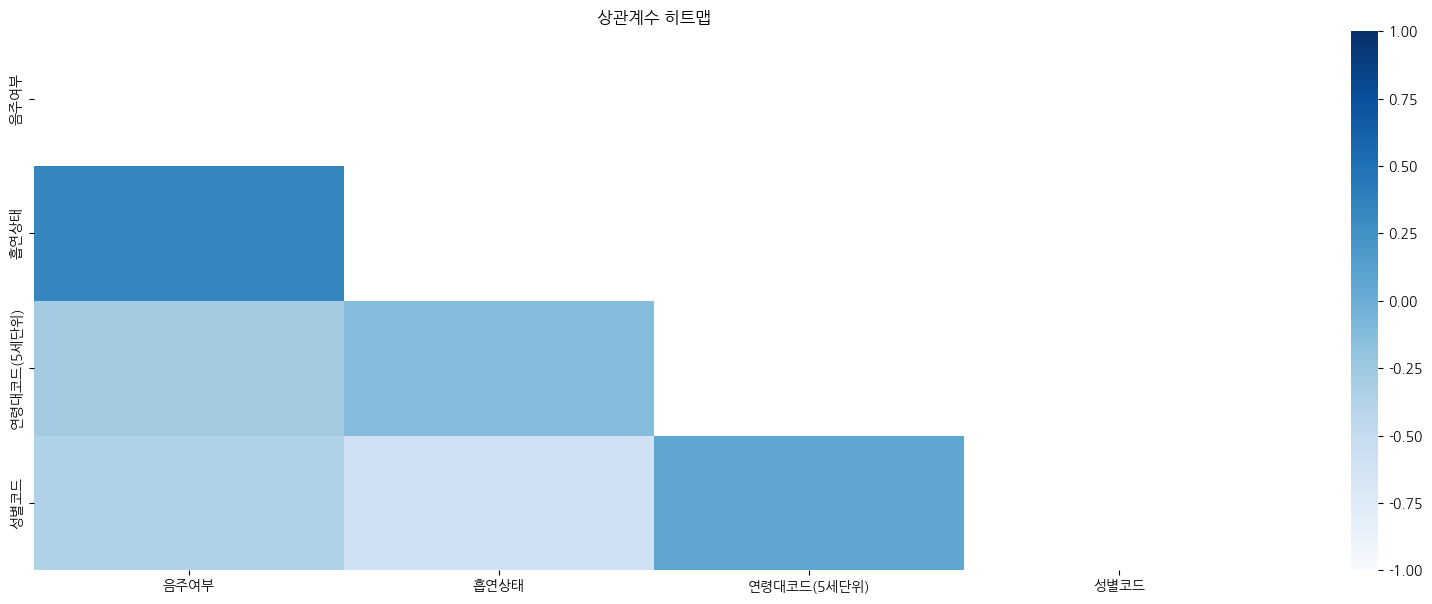

In [32]:

df_sample = df.sample(frac=0.1, random_state=42)


columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
df_small = df_sample[columns]  # 복사본을 만들어 경고 방지
df_corr = df_small.corr()

mask = np.triu(np.ones_like(df_corr, dtype=bool))  # np.triu로 상삼각행렬 마스크 생성
plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="Blues", mask = mask
        , cbar=True, vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()


In [ ]:
#미션 3

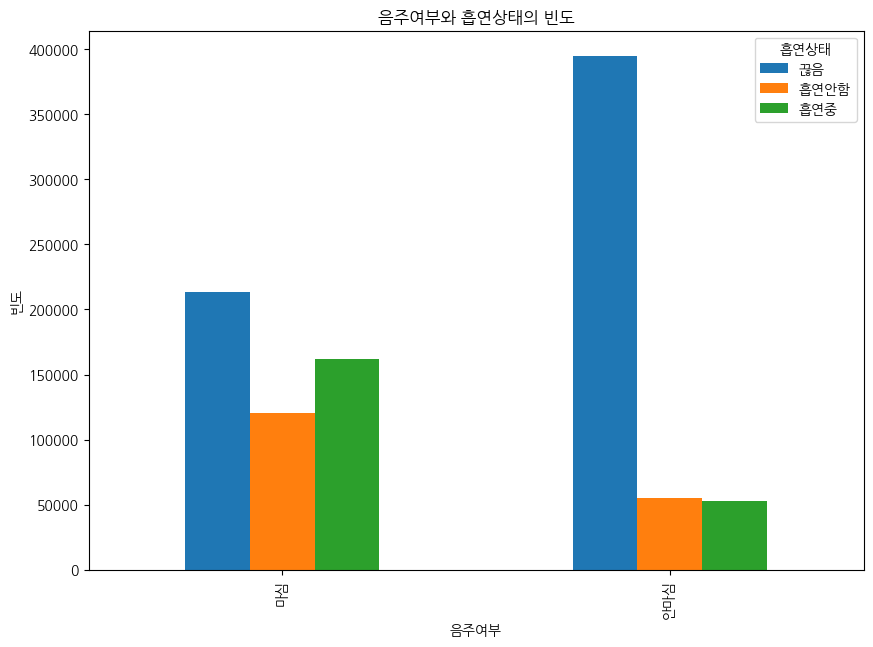

In [54]:
df['흡연상태'] =  df['흡연상태'].replace({ 1.0: '끊음' , 2.0: '흡연안함' , 3.0: '흡연중'})
df['음주여부'] = df['음주여부'].replace({0: "안마심", 1: "마심"})
grouped = df.groupby(['음주여부', '흡연상태']).size().reset_index(name='빈도')


pivot_table = grouped.pivot(index='음주여부', columns='흡연상태', values='빈도')


pivot_table.plot(kind='bar', figsize=(10, 7))
plt.title('음주여부와 흡연상태의 빈도')
plt.ylabel('빈도')
plt.xlabel('음주여부')
plt.show()

In [ ]:
#미션4

/var/folders/sy/gjzm2sts3gd2_l5p_m7x2_j80000gn/T/ipykernel_55965/4216939920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['음주여부'] = filtered_df['음주여부'].replace({0: "안마심", 1: "마심"})


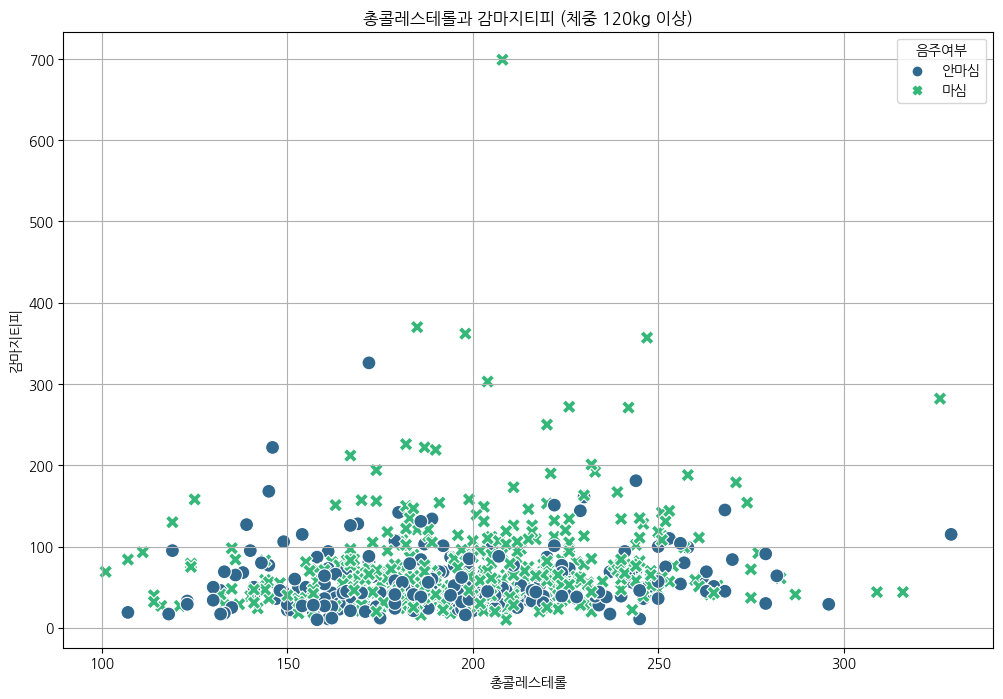

In [67]:
filtered_df = df[df['체중(5Kg 단위)'] > 120]
filtered_df['음주여부'] = filtered_df['음주여부'].replace({0: "안마심", 1: "마심"})


plt.figure(figsize=(12, 8))


sns.scatterplot(data=filtered_df, x='총콜레스테롤', y='감마지티피', hue='음주여부', style='음주여부', palette='viridis', s=100)


plt.title('총콜레스테롤과 감마지티피 (체중 120kg 이상)')
plt.xlabel('총콜레스테롤')
plt.ylabel('감마지티피')
plt.legend(title='음주여부')
plt.grid(True)

plt.show()